# *Did they Churn or Not?*

# Goals:

 - Identify key drivers of churn. 
 - Predict which customers are at risk of churning
 ___

# Imports

In [1]:
import pandas as pd
import numpy as np

import acquire as a
import prepare as p
import explore as e

import seaborn as sns
import matplotlib.pyplot as plt 


from scipy import stats
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")


---------------------------------------------------------------------------------------------------------------

# Acquire

 - Data acquired through Sequel Ace from the Codeup database.
 - Wrote a function in my acquire.py file that includes a sql query to extract the data
 - It contained 7,043 rows and 24 columns before cleaning
 - Each row represents a customer of Telco
 - Each column represents a feature of the dataset 
 
 __________

# Prepare

 - Removed columns that were not useful
 - Checked for nulls in the data (there were none)
 - Checked that column data types were appropriate
 - Encoded variables that would promote useability for my models
 - Created dummy variables for categorical variables
 - Added dummy variables to dataset
 - Split data into train, validate and test (approx. 70/15/15), stratifying on 'churn'
 
 
 _____

# Data Dictionary

| Target Variable |     Definition     |
| :---------------: | :------------------: |
|      Churn      | yes(1) or no(0) customer left |

| Feature  | Definition |
| :-------------: | :-------------: |
| customer_id  | unique id for each customer  |
| payment_type_id | 1, 2, 3, 4 related to payment type |
| internet_service_type_id | 1, 2, 3 related to internet service type |
| contract_type_id | 1, 2, 3 related to contract type |
| gender | male or female |
| senior_citizen | yes(1) or no(0) senior citizen |
| partner | yes or no has a partner | 
| dependents | yes or no has dependents |
| tenure | how long the customer has been with company |
| phone_service | yes or no has phone service |
| multiple_lines | yes or no has multiple_lines |
| online_security | yes or no has online security |
| online_backup | yes or no has online backup |
| device_protection | yes or no has device protection |
| tech_support | yes or no has tech support |
| streaming_tv | yes or no has streaming tv |
| streaming_movies | yes or no has streaming movies |
| paperless_billing | yes or no has paperless billing |
| monthly_charges | monthly charge to customer |
| total_charges | total charge to customer |
| contract_type |  month to month, 1 year, 2 month |
| internet_service_type | Fiber Optic, DSL, None | 
| payment_type | Electronic check, Mailed check, Bank transfer, Credit card |


_____

# A brief look at the data

In [2]:
# acquiring and cleaning the data
df = a.get_telco_data()
df = p.prep_telco(df)

# splitting data into train, validate, and test
col ='churn_encoded'
train, validate, test = p.train_val_test(df, col)

In [3]:
pd.options.display.max_columns = None
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5609,7901-HXJVA,Male,0,No,No,14,Yes,No,No,No,Yes,No,No,No,No,76.45,1117.55,No,Month-to-month,Fiber optic,Electronic check,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
2209,3164-AALRN,Male,0,No,No,5,Yes,No,No,No,Yes,No,Yes,Yes,Yes,70.00,347.4,Yes,One year,DSL,Mailed check,0,0,0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1
6919,9821-POOTN,Male,0,Yes,No,35,Yes,Yes,No,No,No,No,No,No,Yes,75.20,2576.2,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
2284,3259-QMXUN,Male,0,Yes,No,58,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,86.10,4890.5,No,Two year,DSL,Electronic check,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0
845,1226-UDFZR,Female,0,No,No,2,Yes,No,No,Yes,No,No,No,No,Yes,49.60,114.7,Yes,Month-to-month,DSL,Mailed check,1,0,0,1,1,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


# A summary of the data

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 5609 to 5679
Data columns (total 58 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_id                             4930 non-null   object 
 1   gender                                  4930 non-null   object 
 2   senior_citizen                          4930 non-null   int64  
 3   partner                                 4930 non-null   object 
 4   dependents                              4930 non-null   object 
 5   tenure                                  4930 non-null   int64  
 6   phone_service                           4930 non-null   object 
 7   multiple_lines                          4930 non-null   object 
 8   online_security                         4930 non-null   object 
 9   online_backup                           4930 non-null   object 
 10  device_protection                       4930 non-null   o

# Explore

<AxesSubplot:xlabel='churn', ylabel='Count'>

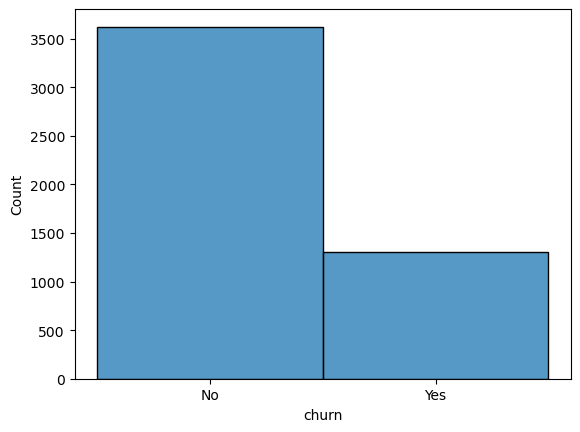

In [5]:
# A basline of how many churned and how many didn't in train dataset
sns.histplot(x = train['churn'], data = train)

### *Do customers with spouses and children churn less than those who do not have any dependents?*

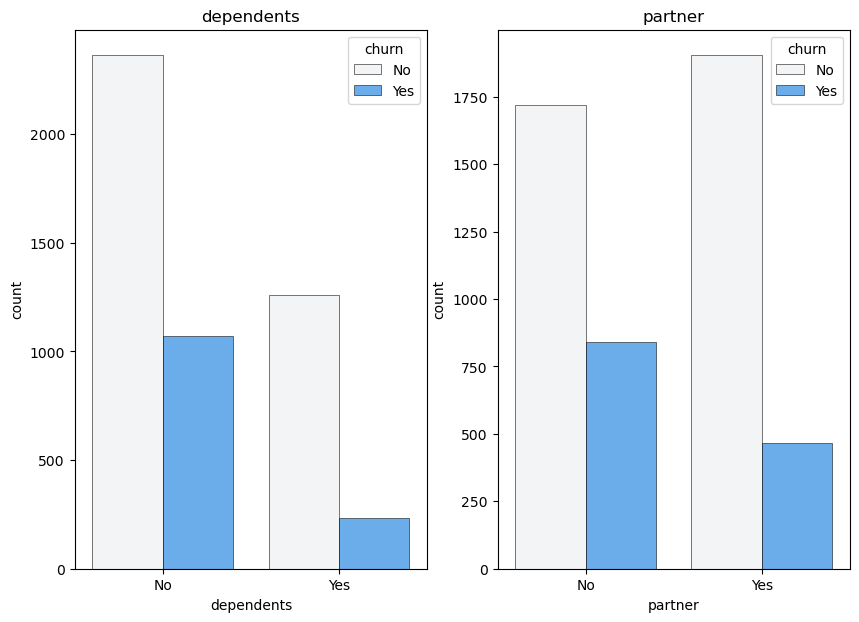

In [6]:
e.countplot('churn', ['dependents', 'partner'], train)

 - After looking at this chart it seems like churn goes down if you do have dependents or a partner 

**Run a chi² test to evaluate dependency of partners and dependets to churning** <br>

$H_0$: Churn is not dependent on whether a customer has a dependent or partner. <br>
$H_a$: Churn is dependent on whether a customer has a dependent or partner.

 - Confidence interval of 95%
 - Alpha is .05


Partner:
chi² = 108.452
p = 2.14e-25

Dependents:
chi² = 127.521
p = 1.43e-29

**Both partner and dependents reject the null hypothesis, because the p-value is less than alpha.
The meaning is a customer who has a partner or dependents does have a relationship with churning. Therefore, featuring these features in my model will likely have a positive impact on the model's accuracy.**
____

### *Does the type of contract a customer have make it more likley to churn?*

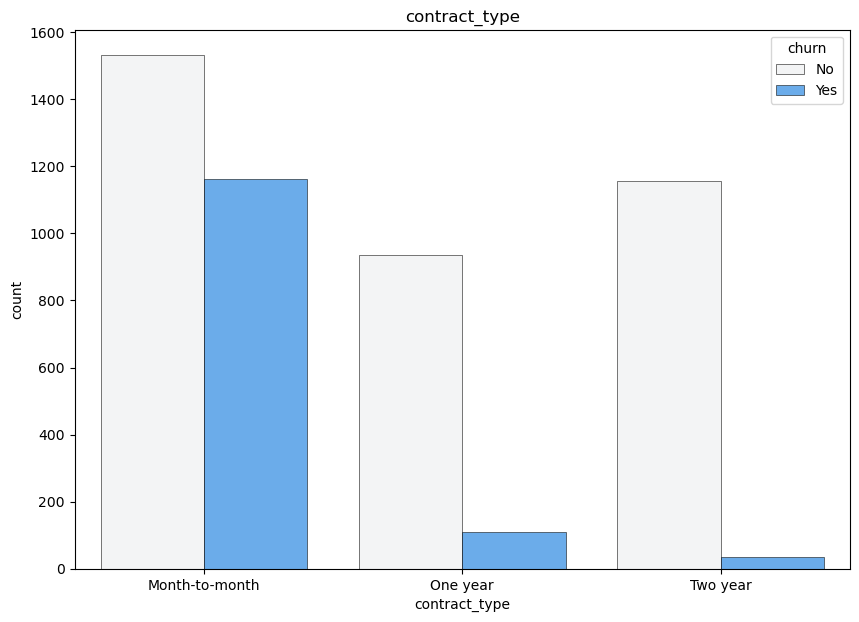

In [21]:
e.countplot('churn', ['contract_type'], train)

- It seems like the longer the contract a customer has the churn rate goes down.
- A customer on a month to month type of contract has the highest churn rate than the other 2 contracts, after observing this chart 

**Run a chi² test to evaluate dependency of customer's contract types to churning** <br>

$H_0$: Churn is not dependent on the customers contract type. <br>
$H_a$: Churn is dependent on the customers contract type.

 - Confidence interval of 95%
 - Alpha is .05

In [22]:
print('Partner:')
e.chi_test('contract_type', train)

Partner:
chi² = 857.552
p = 6.09e-187


**According to our statistical test churn and contract type are related. Featuring these features in my model will likely have a positive impact on the model's accuracy.** 

--------

### *Are customers with different internet service more or less likely to churn?*

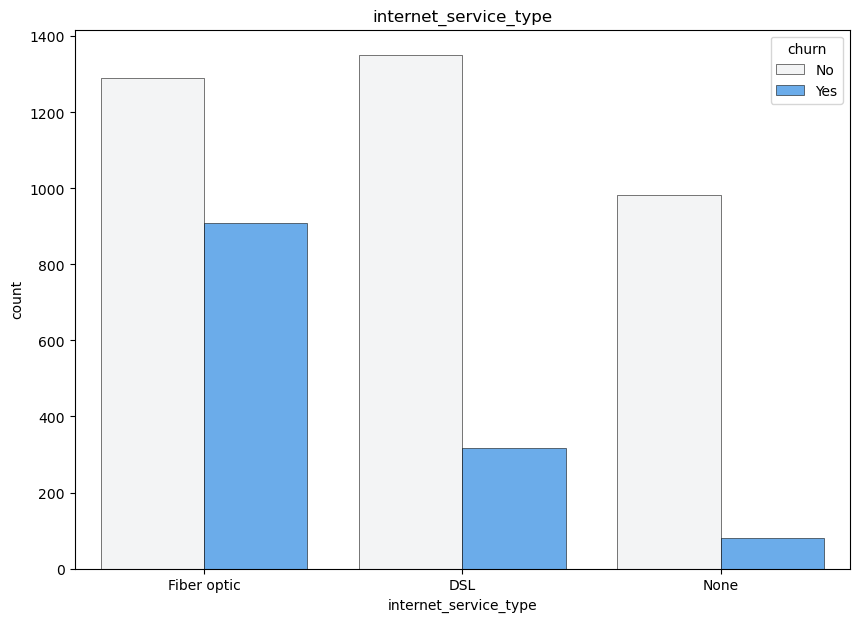

In [24]:
e.countplot('churn', ['internet_service_type'], train)

- Fiber optic seems to have the highest churn rate out of the 3 different services


**Run a chi² test to evaluate dependency of internet service to churning** <br>

$H_0$: Churn is not dependent on the type of internet service. <br>
$H_a$: Churn is dependent on the type of internet service.

 - Confidence interval of 95%
 - Alpha is .05


In [25]:
e.chi_test('internet_service_type',train)

chi² = 490.040
p = 3.88e-107


**We reject the null hypthesis, meaning that churn is dependent on the type of internet service type.**

_____

### *Are Senior Citizens more or less likely to churn than a non Senior Citizen?*


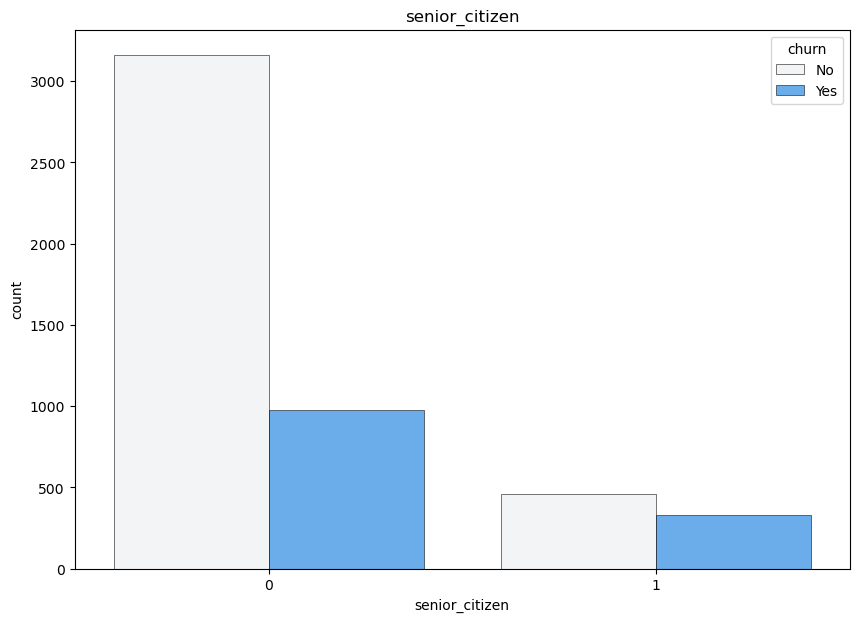

In [27]:
e.countplot('churn', ['senior_citizen'], train)

- Non senior citizens are churning more than those who are senior citizens.

**Run a chi² test to evaluate dependency of Senior Citizens to Non-Senior Citizens churning** <br>

$H_0$: Churn is not dependent on whether a customer is a senior citizen. <br>
$H_a$: Churn is dependent on whether a customer is a senior citizen.

 - Confidence interval of 95%
 - Alpha is .05


In [26]:
e.chi_test('senior_citizen', train)

chi² = 111.212
p = 5.32e-26


**The p-value is less than the Alpha. Therefore, we have support that churning and senior citizen status are related.**

----

# Exploration Summary

 **- Dependents, partner, contract type, internet service type, and senior citizen status were all found to be drivers of churning**

 **- Contract type and internet service type seem to have the strongest influence.**
 
 ------

# Modeling 

- Accuracy will be my evaluation metric
- Baseline for customers not churning is 73.47%
- Ran 3 models including a decision tree, random forest, and a K-nearest neighbor 
- I evaluatied the models on train and validate data 
- The best performing model then was evaluated on test data

### Decision Tree

The Decision Tree train accuracy is 85.72%<br>
The Decision Tree validate accuracy is 85.59%

### Random Forest 

The Random Forest train accuracy is 84.64%<br>
The Random Forest validate accuracy is 84.58%

### K-Nearest Neighbor

The K-Nearest Neighbor train accuracy is 82.10% <br>
The K-Nearest Neighbor validate accuracy is 82.10%

### Modeling Summary

**The best performing model is the decision tree, so we tested the model with the test data**

The Decision Tree test accuracy is 86%

------

# Conclusions

 - Customers who have dependents or partners churned at a much lower rate those those who did not
  
 - The longer the contract a customer had the less likely they were to churn. With month-to-month having the most churned customers.
 
 - Customers who have fiber optic internet are more likely to churn compared to other internet customers
 
 - Non Senior citizens are more likely to churn than senior citizens.
 
**Best Model's performance:<br>
Accuracy of 85.72% on in-sample (train), 85.59% on out-of-sample data (validate) and an accuracy of 86% on the test data.**

## Recommendations
- We would want to target those who have dependents or partners to be within our target market. Seeing that customers that have dependents or a partner churn at a lower rate.

- I would recommend promoting longer contracts for our customers.

## Next Steps

- Figure out why month to month and fiber optic customers are churning at such a high rate.
- Consider adding different hyperparameters to models. 
